In [2]:
import numpy
%matplotlib nbagg
from matplotlib import pyplot
from tqdm import tqdm, tnrange

import aotools
from aotools.turbulence import phasescreen

This function create a large phase screen with a set L0 parameters, then simulates propagating the screen. A Zernike analysis is performed to measure the r0 and L0 values

In [95]:
n_zerns = 49
nx_size = 128
pxl_scale = 8./nx_size
r0 = 0.2
L0 = 20.
l0 = 0.01
screen_size_factor = 16

total_scrn_size = screen_size_factor * nx_size
print("Total Screen Size: {}".format(total_scrn_size))

# Create arrary of zernikes
print("Make Zernikes...")
Zs = aotools.zernikeArray(n_zerns, nx_size, norm="rms")
#############################
# Zs_jo = []
# N = 128
# for i in range(50):
#     Zs_jo.append(anyZernike(int(i), 128))
# Zs_jo = numpy.array(Zs_jo)
# Zs = Zs_jo[1:]
##########################

wind_speed = 10 #m/s - just arbitrarily set
time_step = pxl_scale/wind_speed # This is timestep, as one pixel added on each iteration
print("Time step: {}s".format(time_step))

n_scrns = total_scrn_size - nx_size

n_tests = 16

z_coeffs = numpy.zeros((n_tests, n_scrns, n_zerns))
z_vars = numpy.zeros((n_tests, n_zerns))
for n in tnrange(n_tests):
    print("Make large phase screen...")
    phase_screen = phasescreen.ft_phase_screen(r0, total_scrn_size, pxl_scale, L0, 0.01)[:, :nx_size]

    print("Get Zernike Coeffs")
#     fig = pyplot.figure()
    for i in tnrange(n_scrns):
        scrn = phase_screen[i:i+nx_size]
        
        if n%4 == 0:
            scrn = scrn
        elif n%4 == 1:
            scrn = scrn.T
        elif n%4 == 2:
            scrn = scrn[::-1]
        else:
            scrn = scrn.T[::-1]
        
#         pyplot.cla()
#         pyplot.imshow(scrn)
#         fig.canvas.draw()
        z_coeffs[n, i] = (scrn * Zs).sum((-1, -2))/(Zs[0].sum())

    z_vars[n] = z_coeffs[n].var(0)


Total Screen Size: 2048
Make Zernikes...
Time step: 0.00625s
Make large phase screen...
Get Zernike Coeffs
Make large phase screen...
Get Zernike Coeffs
Make large phase screen...
Get Zernike Coeffs
Make large phase screen...
Get Zernike Coeffs
Make large phase screen...
Get Zernike Coeffs
Make large phase screen...
Get Zernike Coeffs
Make large phase screen...
Get Zernike Coeffs
Make large phase screen...
Get Zernike Coeffs
Make large phase screen...
Get Zernike Coeffs
Make large phase screen...
Get Zernike Coeffs
Make large phase screen...
Get Zernike Coeffs
Make large phase screen...
Get Zernike Coeffs
Make large phase screen...
Get Zernike Coeffs
Make large phase screen...
Get Zernike Coeffs
Make large phase screen...
Get Zernike Coeffs
Make large phase screen...
Get Zernike Coeffs



<IPython.core.display.Javascript object>


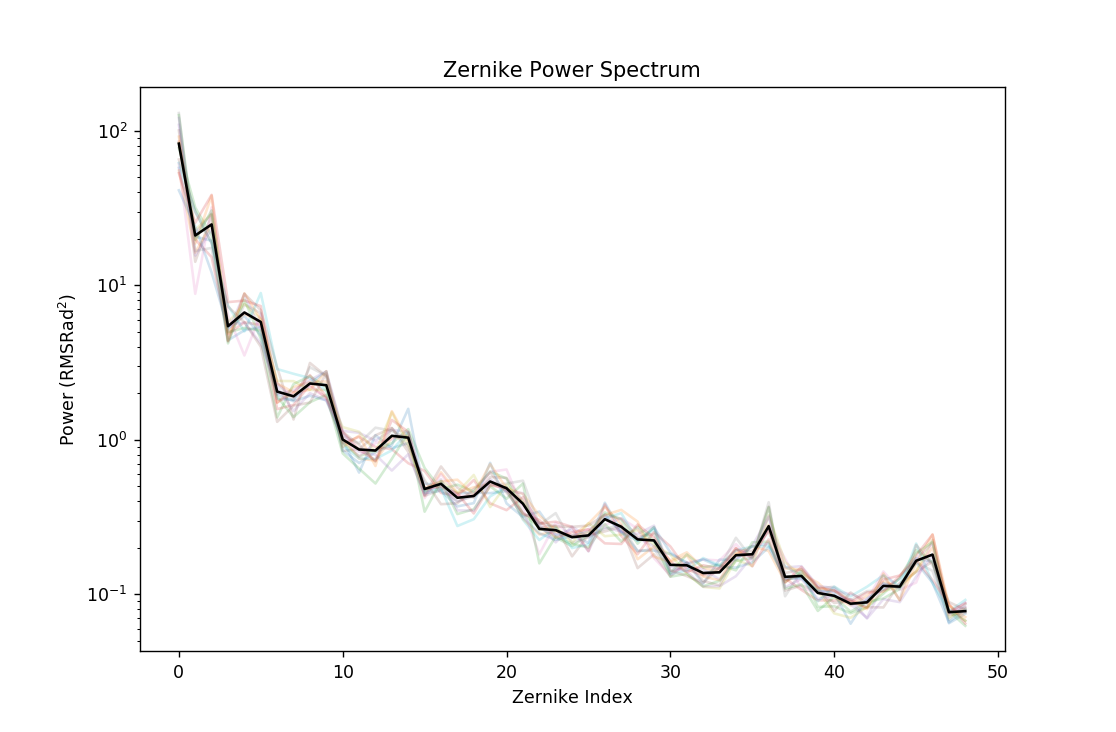

In [96]:
pyplot.figure()

pyplot.semilogy(z_vars.T, alpha = 0.2)
pyplot.semilogy(z_vars.mean(0), color="k")
pyplot.title("Zernike Power Spectrum")
pyplot.xlabel("Zernike Index")
pyplot.ylabel("Power ($\mathrm{RMS Rad}^2$)")

<IPython.core.display.Javascript object>


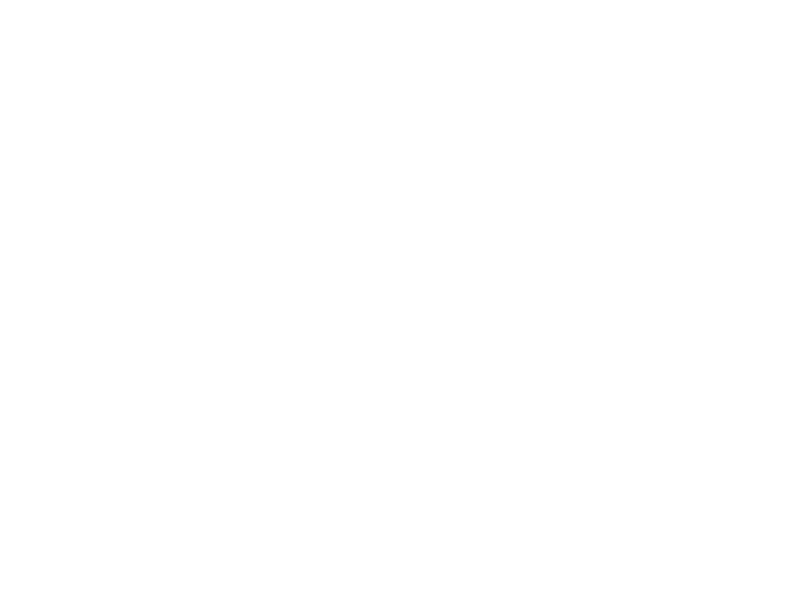

plot Z1
plot Z6
plot Z99


In [38]:
pyplot.figure()
plot_zs = [1, 6, 99]
for i, z in enumerate(plot_zs):
    print("plot Z{}".format(z))
    zn_coeffs = z_coeffs.mean(0)[:, z]
    z_ps = abs(numpy.fft.fft(zn_coeffs))**2
    x_vals = numpy.fft.fftfreq(len(z_ps), d=time_step)
    pyplot.loglog(x_vals[:n_scrns//2], z_ps[:n_scrns//2], label="Z_{}".format(z))
    pyplot.xlabel("Frequency (Hz)")
    pyplot.ylabel("Power ($\mathrm{Rad RMS}^2$)")
    pyplot.grid()
pyplot.legend()

<IPython.core.display.Javascript object>


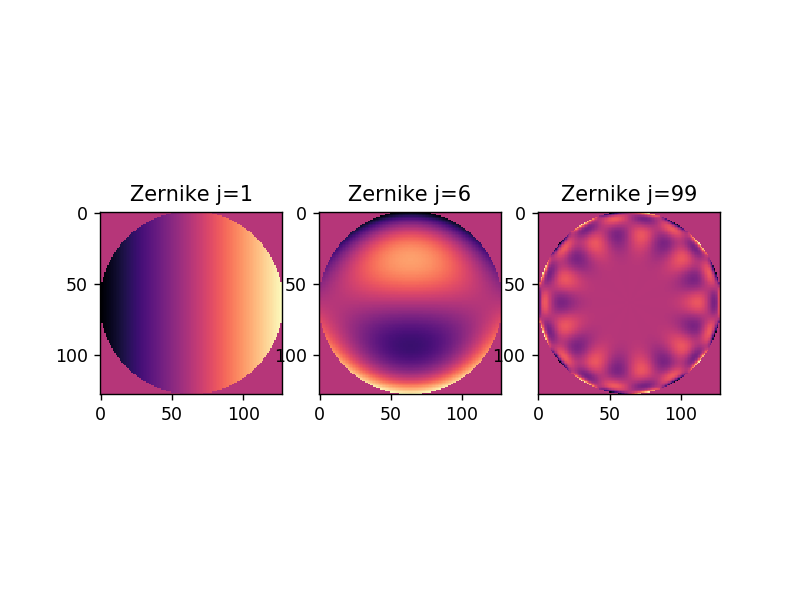

In [35]:
pyplot.figure()
for i, z in enumerate(plot_zs):
    pyplot.subplot(1, len(plot_zs), i+1)
    pyplot.imshow(Zs[z])
    pyplot.title("Zernike j={}".format(z))


In [48]:
import numpy


# Mapping from zernike name to number (1-15)
zernikeNumbers = {
    'piston': 1,
    'tip': 2,
    'tilt': 3,
    'focus': 4,
    'astig1': 5,
    'astig2': 6,
    'coma1': 7,
    'coma2': 8,
    'trefoil1': 9,
    'trefoil2': 10,
    'spherical': 11,
    'z12': 12,
    'z13': 13,
    'z14': 14,
    'z15': 15
}

zernikeDegFreqToNum = {
  1:(0,0,0),
  2:(1,1,0),  3:(1,1,1),
  4:(2,0,0),  5:(2,2,1),  6:(2,2,0),
  7:(3,1,1),  8:(3,1,0),  9:(3,3,1), 10:(3,3,0),
 11:(4,0,0), 12:(4,2,0), 13:(4,2,1), 14:(4,4,0), 15:(4,4,1),
 16:(5,1,0), 17:(5,1,1), 18:(5,3,0), 19:(5,3,1), 20:(5,5,0), 21:(5,5,1),
 22:(6,0,0), 23:(6,2,1), 24:(6,2,0), 25:(6,4,1), 26:(6,4,0), 27:(6,6,1), 28:(6,6,0),
 29:(7,1,1), 30:(7,1,0), 31:(7,3,1), 32:(7,3,0), 33:(7,5,0), 34:(7,5,1), 35:(7,7,0), 36:(7,7,1),
 37:(8,0,0), 38:(8,2,0), 39:(8,2,1), 40:(8,4,0), 41:(8,4,1), 42:(8,6,0), 43:(8,6,1), 44:(8,8,0), 45:(8,8,1),
 46:(9,1,0), 47:(9,1,1), 48:(9,3,0), 49:(9,3,1), 50:(9,5,0), 51:(9,5,1), 52:(9,7,0), 53:(9,7,1), 54:(9,9,0), 55:(9,9,1)
}

def factorial(up_num,low_num=1):
  j=1.0
  for i in range(low_num,up_num+1):
    if i!=0: j=j*i
  return(j+0.0)   

def zernNumToDegFreq(num):
   '''Return the n,m, and even/oddness of a given Zernike number
     as defined in Hardy's "AO for Astronomical Telescope"'''
   if num==0: return([-1,-1,-1])
   target=0
   n=0
   while 1:
      for m in numpy.arange(1+int(n-n%2)/2)*2+(n%2):
         target=target+1
         if target==num: return([n,m,num%2])
         if m!=0:
            target=target+1
            if target==num: return([n,m,num%2])
      n=n+1  

def anyZernike(znum, gridSize, outerRadius=None, ratio=1, ongrid=1, clip=1, verbose=0):
  if outerRadius == None: outerRadius = (gridSize-1.0)/2.0+1.0e-10
  baseRadius = radius(gridSize, gridSize, ratio, ongrid)/outerRadius+0.0 # need double precision
  zern=baseRadius*0.0

  if verbose:
    print("Zernike number %d:" % (znum))

  # extract the core parameters
  n = int(zernNumToDegFreq( znum )[0])
  m = int(zernNumToDegFreq( znum )[1])
  odd = int(zernNumToDegFreq( znum )[2])
  if verbose:
    print("\tn=%d, m=%d, odd=>%d" % (n,m,odd))

  # prepare our r^[n-2S] and cos here
  numr=int(n-m/2)
  etom = expTheta(gridSize, gridSize, ongrid)
  etom = etom**m

  for S in range( int((n-m)/2+1) ):
    coeff=((-1.0)**S)*factorial(n-S) # numerator
    coeff=coeff/(factorial(S) * factorial(int((n+m)/2-S)) * factorial(int((n-m)/2-S)) ) # denominator
    zern=zern+coeff*baseRadius**(n-2*S)
    if verbose:
      print("\tr^%d, coeff = %5.3f" % (n-2*S,coeff))

  if m==0:
    zern=zern*numpy.sqrt(n+1)
  else:
    if odd:
      zern=zern*etom.imag*numpy.sqrt(2*n+2)
    else:
      zern=zern*etom.real*numpy.sqrt(2*n+2)
  if clip: 
     return(zern*numpy.less_equal(baseRadius, 1.0))
  else:
     return(zern)

def radius(xSize, ySize, ratio=1, ongrid=1, offset=None):
    '''Calculate the radius from the centre of a rectangular grid
      ongrid=1 = the coordinates are relative to pixel edges
      ongrdi=0 = the coordinates are relative to pixel centres'''
    if offset == None:
       rx = numpy.arange(xSize) - (xSize-ongrid*1.0)/2.0 
       ry = numpy.arange(ySize) - (ySize-ongrid*1.0)/2.0
    elif len(offset)>1:
       rx = numpy.arange(xSize) - (xSize-ongrid*1.0)/2.0 - offset[0]
       ry = numpy.arange(ySize) - (ySize-ongrid*1.0)/2.0 - offset[1]
    else:
       rx = numpy.arange(xSize) - (xSize-ongrid*1.0)/2.0 - offset
       ry = numpy.arange(ySize) - (ySize-ongrid*1.0)/2.0 - offset
    ry *= ratio # scale
    rxSquared = rx*rx
    rySquared = ry*ry
    rSquared = numpy.add.outer(rySquared,rxSquared)
    return(numpy.sqrt(rSquared))

def radius_coordIndep(coords):
    '''Calculate the radius from a set of coordinates'''
    rxSquared = coords[:,0]**2
    rySquared = coords[:,1]**2
    return(numpy.sqrt(rxSquared**2+rySquared**2))

def angle(xSize, ySize, ongrid=1, offset=None):
    '''Calculate the angle from centre of grid -> row=x, column=y
      and define 0/2pi as along (xSize/2,<any>)'''
    if offset == None:
       rx = numpy.arange(xSize) - (xSize-ongrid*1.0)/2.0 
       ry = numpy.reshape( arange(ySize) - (ySize-ongrid*1.0)/2.0 , (-1,1) )
    elif len(offset)>1:
       rx = numpy.arange(xSize) - (xSize-ongrid*1.0)/2.0 -offset[0]
       ry = numpy.reshape( arange(ySize) - (ySize-ongrid*1.0)/2.0 , (-1,1) ) -offset[1]
    else:
       rx = numpy.arange(xSize) - (xSize-ongrid*1.0)/2.0 -offset
       ry = numpy.reshape( arange(ySize) - (ySize-ongrid*1.0)/2.0 , (-1,1) ) -offset
    angle = numpy.arctan2(rx, ry)+numpy.pi # +pi so 0 le angle le 2pi
#    if (ySize-ongrid*1.)/2. % 1:
#      angle = where( rx == 0 and ry > 0
    return(angle)

def expTheta(xSize, ySize, ongrid, ratio=1):
    '''Return a rectangular grid containing exp(i*theta), where theta is 
       the angle between the positive x axis and the vector from the centre
       of the grid to each gridpoint'''
    rx = numpy.arange(xSize) - (xSize-1.0*ongrid)/2.0 
    ry = numpy.arange(ySize) - (ySize-1.0*ongrid)/2.0
    cosPart = rx
    sinPart = numpy.reshape(1j*ry, (-1,1))
    self = (cosPart + sinPart)/(1.0e-10 + radius(xSize, ySize, ratio, ongrid))
    return(self)

def expTheta_coordIndep(coords):
    '''Return a set of coordinates containing exp(i*theta), where theta is 
       the angle between the positive x axis and the vector from the centre
       of the grid to each gridpoint'''
    cosPart = coords[:,0]
    sinPart = 1j*coords[:,1]
    self = (cosPart + sinPart)/(1.0e-10 + radius_coordIndep(coords))
    return(self)

In [87]:
Zs_jo = []
N = 128
for i in range(50):
    Zs_jo.append(anyZernike(int(i), 128))
Zs_jo = numpy.array(Zs_jo)

Zs = aotools.zernikeArray(n_zerns, nx_size, norm='rms')

<IPython.core.display.Javascript object>


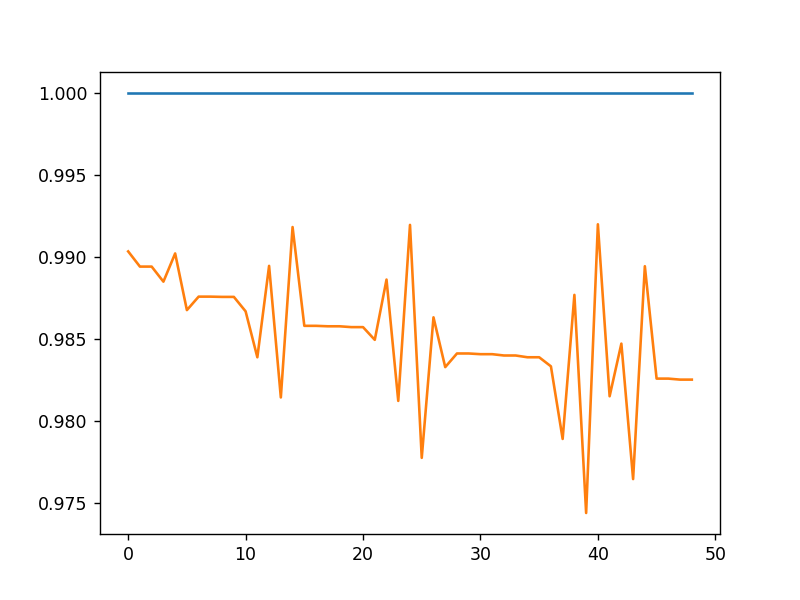

(49, 128, 128)
(49,)


In [94]:
pyplot.figure()
print(Zs.shape)
print((Zs**2).sum((1,2)).shape)

pyplot.plot(numpy.sqrt((Zs**2).sum((1,2))/Zs[0].sum()), label="APR")
pyplot.plot(numpy.sqrt((Zs_jo[1:]**2).sum((1,2))/Zs[0].sum()), label="JO")

In [ ]:
pyplot.figure()
pyplot.plot(Zs.max((1,2)), label="APR")
pyplot.plot(Zs_jo[1:].max((1,2)), label="JO")
pyplot.legend()

<IPython.core.display.Javascript object>


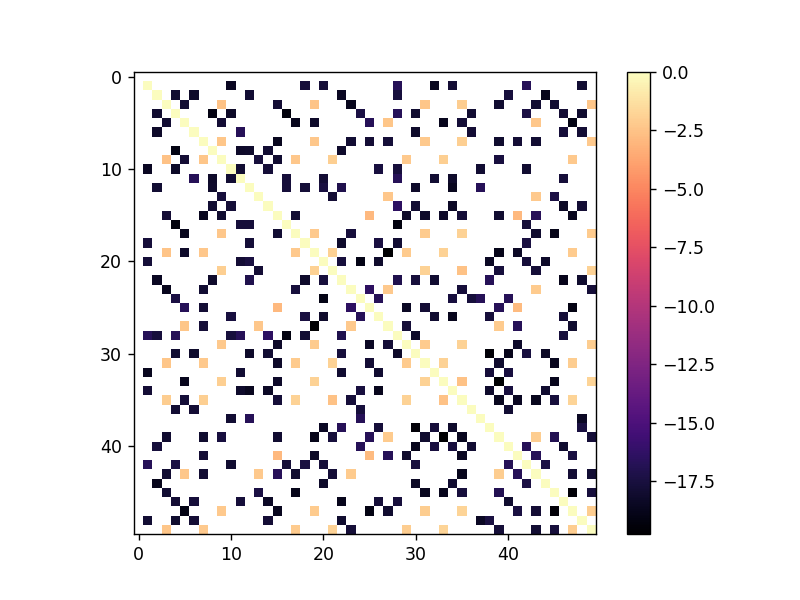

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: divide by zero encountered in log10
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: invalid value encountered in log10


In [107]:
z_norm = numpy.zeros((len(Zs_jo), len(Zs_jo)))
for i, zi in enumerate(Zs_jo):
    for j, zj in enumerate(Zs_jo):
        z_norm[i, j] = (zi*zj).sum()/Zs_jo[1].sum()
pyplot.figure()
pyplot.imshow(numpy.log10(z_norm))
pyplot.colorbar()

<IPython.core.display.Javascript object>


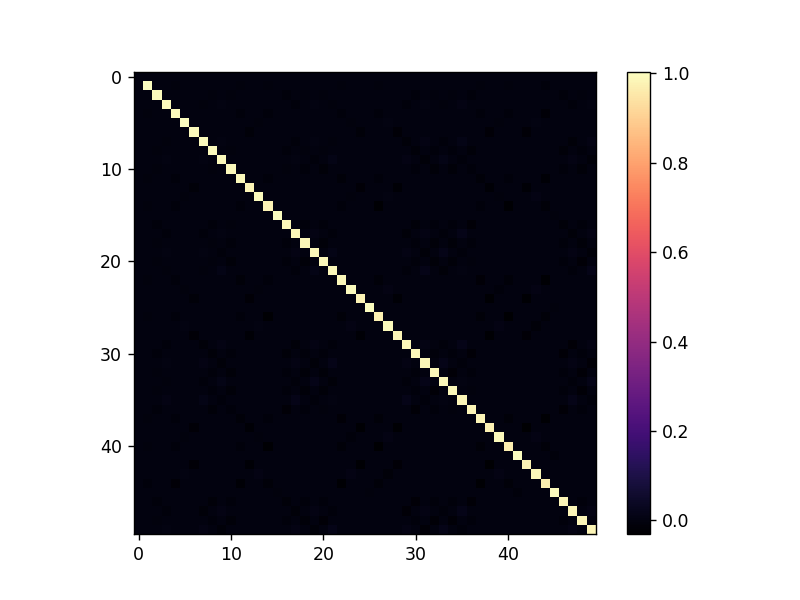

<IPython.core.display.Javascript object>


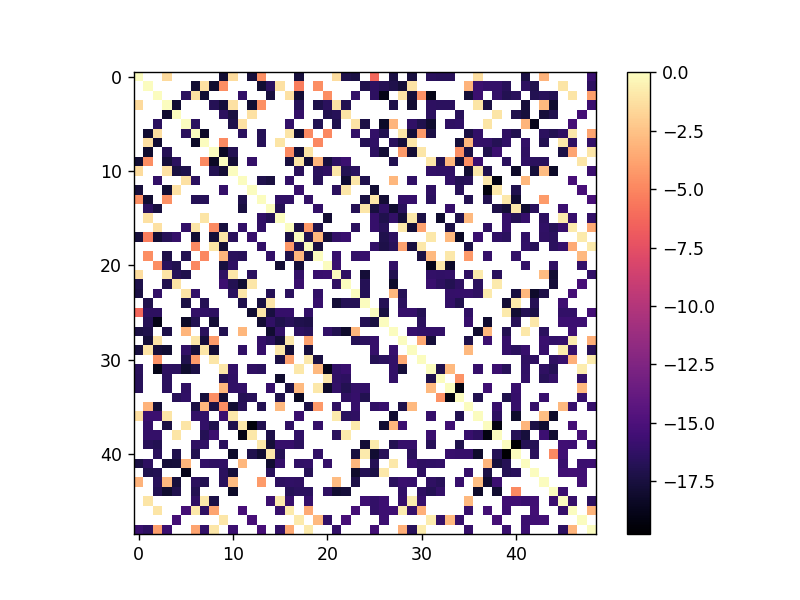

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: divide by zero encountered in log10
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: invalid value encountered in log10


In [109]:
z_norm = numpy.zeros((len(Zs), len(Zs)))
for i, zi in enumerate(Zs):
    for j, zj in enumerate(Zs):
        z_norm[i, j] = (zi*zj).sum()/Zs_jo[1].sum()
pyplot.figure()
pyplot.imshow(numpy.log10(z_norm))
pyplot.colorbar()